In [48]:
import matplotlib.pyplot as plt
from modulations import analog as amod 
from modulations import *
import numpy as np

# Test Line Coding
---

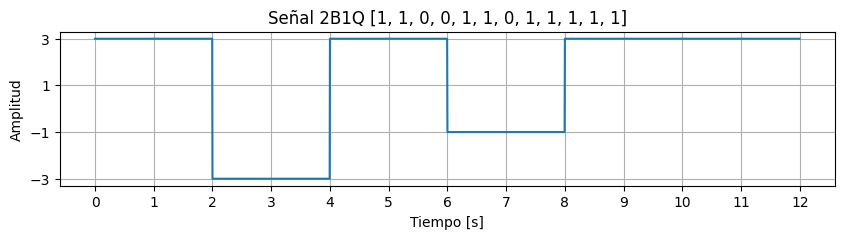

In [49]:
msg = [1,1,0,0,1,1,0,1,1,1,1,1]
Tb = 1
Fs = 200/Tb

t, signal, _ = twoB1Q(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal 2B1Q {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([-3, -1, 1, 3])
plt.grid(True)
plt.show()

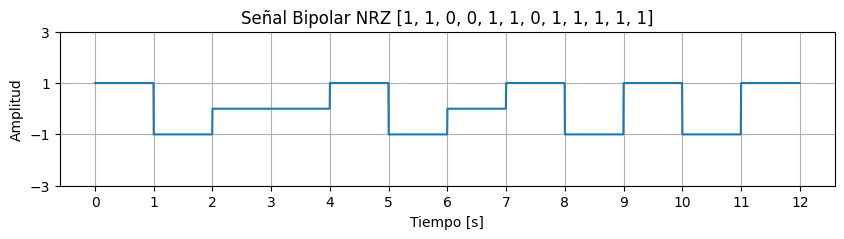

In [ ]:
t, signal, _ = bipolar_nrz(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([-3, -1, 1, 3])
plt.grid(True)
plt.show()

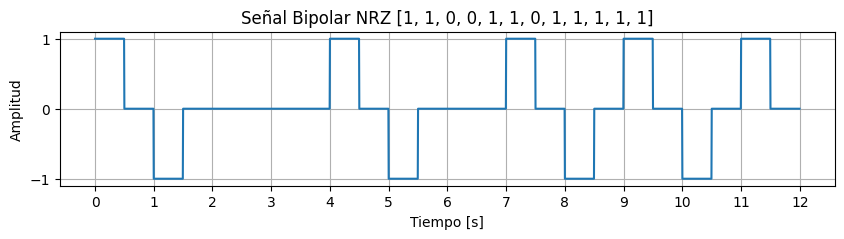

In [56]:
t, signal, _ = bipolar_rz(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([-1, 0, 1])
plt.grid(True)
plt.show()

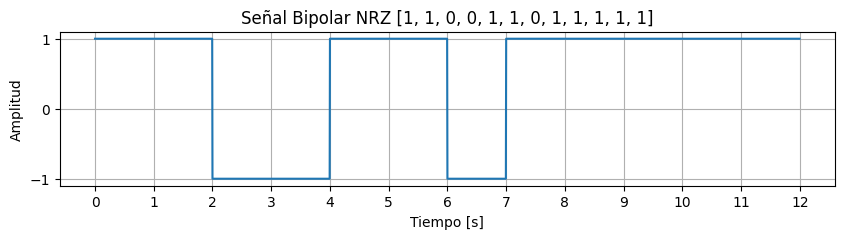

In [57]:
t, signal, _ = polar_nrz(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([ -1, 0, 1])
plt.grid(True)
plt.show()

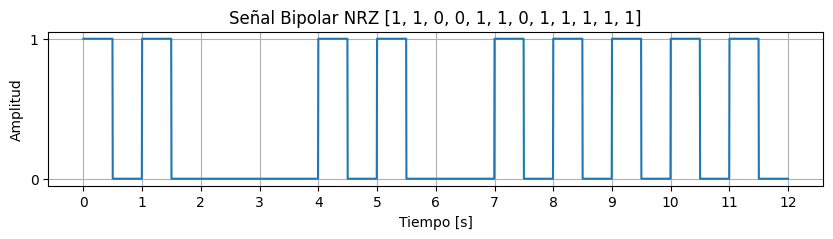

In [59]:
t, signal, _ = unipolar_rz(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([ 0, 1])
plt.grid(True)
plt.show()

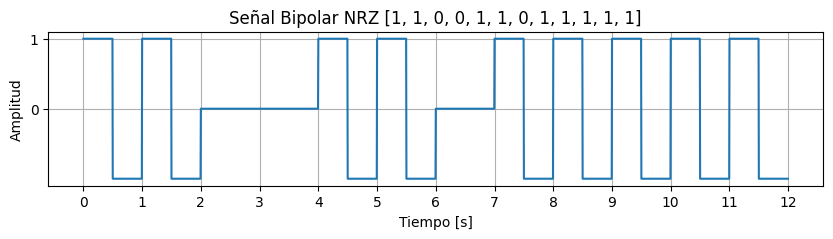

In [60]:
t, signal, _ = manchester(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([ 0, 1])
plt.grid(True)
plt.show()

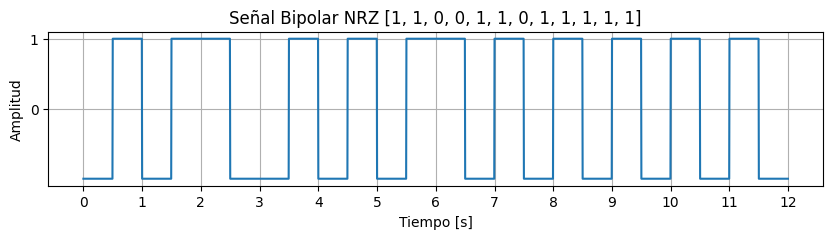

In [61]:
t, signal, _ = differential_manchester(msg, Tb, Fs)

plt.figure(figsize=(10,2))
plt.plot(t, signal)
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.title(f"Señal Bipolar NRZ {msg}")
plt.xticks(range(0,13))
plt.yticks([0,0.5,1])
plt.yticks([ 0, 1])
plt.grid(True)
plt.show()

# Test Digital Modulations
---

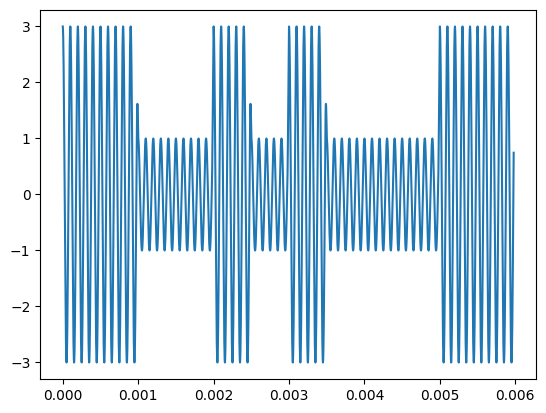

In [4]:
M = 2
R = 2e3
samples_per_bit = 25

bits = '110010100011'
Tb = 1/R
fc = 10e3

Tmax = 10e-3
res = 1e-6

fs = int(R * samples_per_bit)  
fs_out = 1/res

# 4ASK
t, I, Q = m_ask(bits, M, Tb, fs)
t, out = carrier(I, Q, t, fc, fs=fs_out)

plt.plot(t,out)


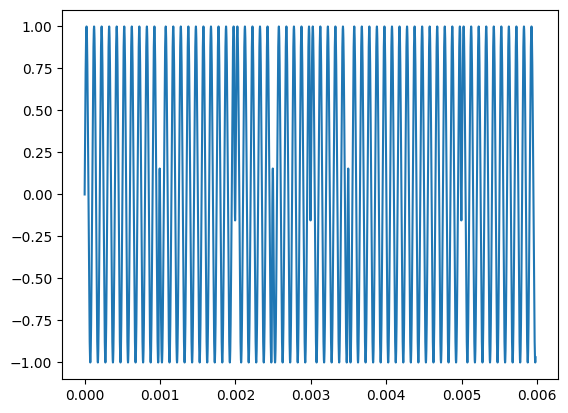

In [5]:
# 4PSK
t, I, Q = m_psk(bits, M, Tb, fs)
t, out = carrier(I, Q, t, fc, fs=fs_out)

plt.plot(t,out)

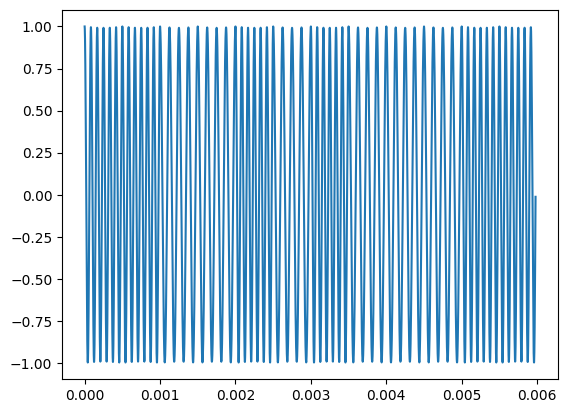

In [6]:
# 4FSK
t, I, Q = m_fsk(bits, M, Tb, fs)
t, out = carrier(I, Q, t, fc, fs=fs_out)

plt.plot(t,out)

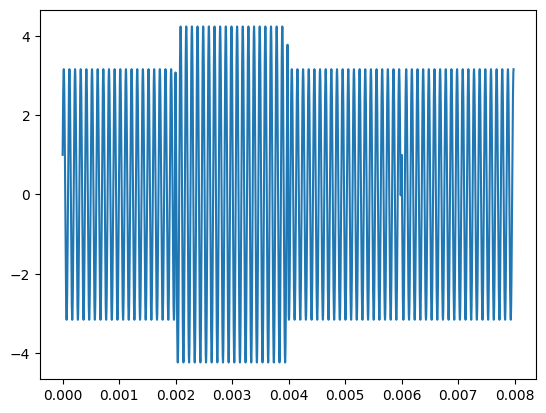

In [7]:
# 16QAM
M = 16
bits = [1,1,0,0,
		1,0,1,0,
		0,0,1,1,
		1,1,1,0]

t, I, Q = m_qam(bits, M, Tb, fs)
t, out = carrier(I, Q, t, fc, fs=fs_out)
plt.plot(t,out)

# Test Analog Modulations
---

In [22]:
Tmax = 1e-3
res = .1e-6
f_c = 100e3
f_m = 1e3

t = np.arange(0, Tmax, res)

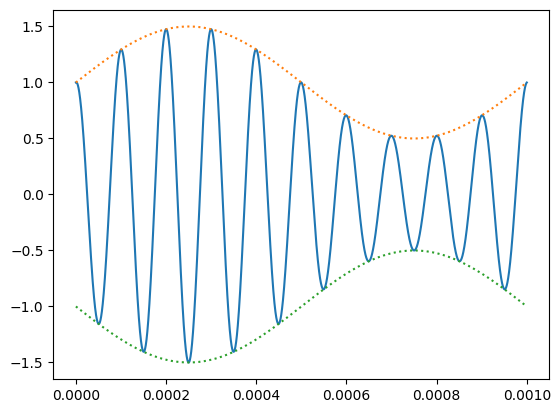

In [ ]:
# AM
m = .5
m_t = m * np.sin( 2* np.pi * f_m * t )


out, complex_envelopment = amod.DSB(t, m_t, fc)

plt.plot(t, out)
plt.plot(t, m_t+1, linestyle=':')
plt.plot(t, -m_t-1, linestyle=':')

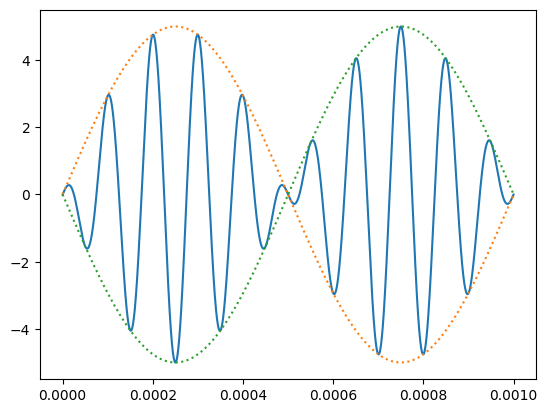

In [ ]:
# DSB-SC
m_t = 5 * np.sin( 2* np.pi * f_m * t )

out, complex_envelopment = amod.DSB_SC(t, m_t, fc)

plt.plot(t, out)
plt.plot(t, m_t, linestyle=':')
plt.plot(t, -m_t, linestyle=':')

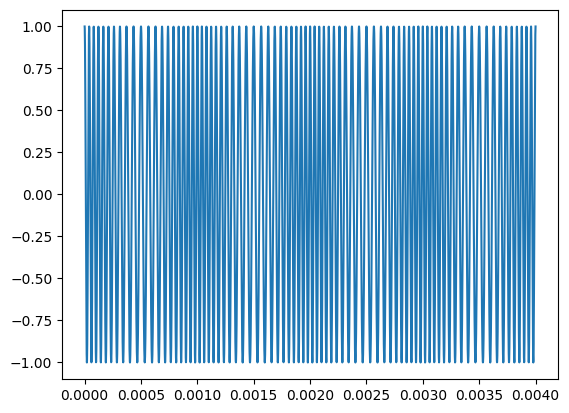

In [46]:
# PM
Tmax = 4e-3
res = 1e-6        
f_c = 100e3       
f_m = 1e3         

t = np.arange(0, Tmax, res)

m_t = 1 * np.sin( 2* np.pi * f_m * t )

out, complex_envelopment = amod.PM(t, m_t, fc, Kp=5)

plt.plot(t, out)


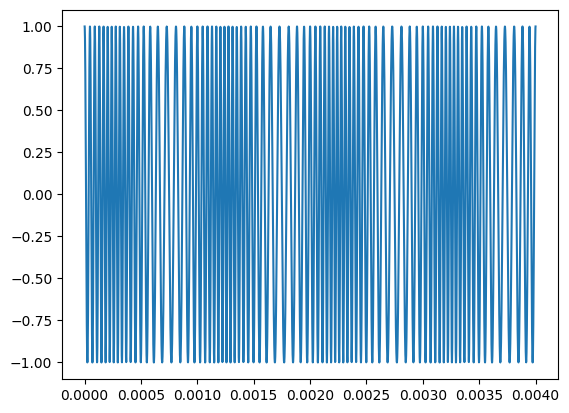

In [40]:
# FM
Tmax = 4e-3
res = 1e-6        
f_c = 100e3       
f_m = 1e3         

t = np.arange(0, Tmax, res)

m_t = 1 * np.sin( 2* np.pi * f_m * t )

out, complex_envelopment = amod.FM(t, m_t, fc, Kf=50e3)

plt.plot(t, out)
